In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [11]:
sns.set(font_scale=1.2, style='ticks')

In [12]:
df = pd.read_csv('population_pyramid_df.csv', index_col=0)

In [13]:
temp = df[df['year']==199]
temp.head()

,year,age,male,female
ind,,,,
20298,199,0,48,29
20299,199,1,46,35
20300,199,2,38,43
20301,199,3,40,48
20302,199,4,33,37


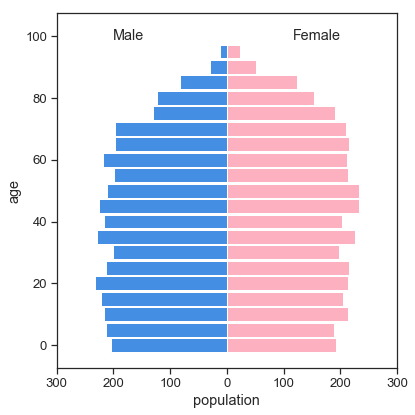

In [14]:

a = temp['age']
m = temp['male']
f = temp['female']
a3, m2, f2 = [], {}, {}
for i,j,k in zip(a,m,f):
    ag = int(np.floor(i/5))*5
    if i%5==0: 
        a3.append(ag)
        m2[ag] = 0
        f2[ag] = 0
    m2[ag]+=j
    f2[ag]+=k
m3 = [ m2[ag] for ag in a3 ]
f3 = [ f2[ag] for ag in a3 ]
fig, ax = plt.subplots(figsize=(6,6))
ax.barh(a3,[ -k for k in m3 ], height=4.5, align='center', color='#448ee4')
ax.barh(a3,[ k for k in f3 ], height=4.5, align='center', color='#fdb0c0')
ax.set_xlim([-300,300])
ax.set_xticks([ i*100-300 for i in range(7) ])
ax.set_xticklabels([ abs(i*100-300) for i in range(7) ])
ax.set_ylabel('age')
ax.set_xlabel('population')
ax.text(-200, 100, 'Male', ha='left', va='center')
ax.text(200, 100, 'Female', ha='right', va='center')
plt.savefig('pyramid_final_year.png', dpi=70)
plt.tight_layout()